# Scalable Models Of Probabilistic Forecasting For Fuzzy Time Series - Appendix A


[MINDS - Machine Intelligence and Data Science Lab ](http://www.minds.eng.ufmg.br/)

[Post Graduate Program in Electrical Engineering - PPGEE]()

[Federal University of Minas Gerais - UFMG]()

* Author: Petrônio C.  L. Silva  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span>
* Advisor: Frederico Gadelha Guimarães <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0001-9238-8839" href="https://orcid.org/0000-0001-9238-8839" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span>
* Co-Advisor: Hossein Javedani Sadaei

In case you have any questions, do not hesitate in contact us using the following e-mail: petronio.candido@ifnmg.edu.br

<center>
<table><tr><td> <a href="http://www.minds.eng.ufmg.br/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/minds_logo_medium.jpeg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 
  <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
<td><a href="https://pyfts.github.io/pyFTS/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/logo_medium.png" alt="pyFTS - Fuzzy Time Series for Python" width="100"/></a></td>
</tr>
</table>
</center>



## Library Installation

In [0]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-uquodabu
  Running command git clone -q https://github.com/PYFTS/pyFTS /tmp/pip-req-build-uquodabu
  Stored in directory: /tmp/pip-ephem-wheel-cache-dfol0m1w/wheels/e7/32/a9/230470113df5a73242a5a6d05671cb646db97abf14bbce2644
Successfully built pyFTS
  Found existing installation: pyFTS 1.6
    Uninstalling pyFTS-1.6:
      Successfully uninstalled pyFTS-1.6


## Common Imports

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Datasets

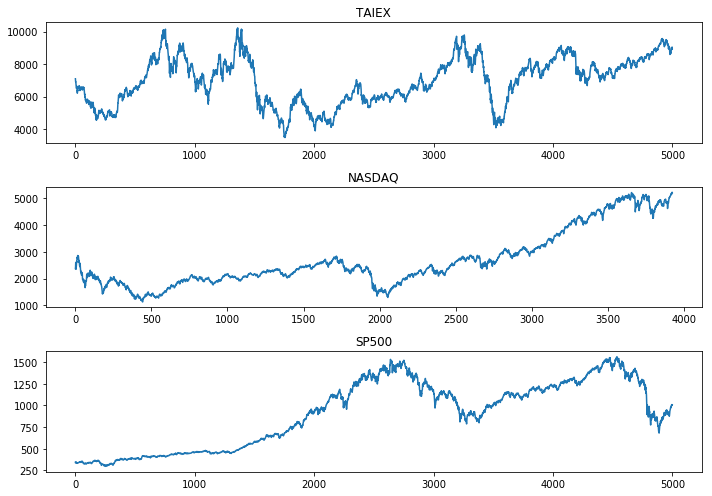

In [0]:
from pyFTS.data import TAIEX, NASDAQ, SP500

datasets = {}

datasets['TAIEX'] = TAIEX.get_data()[:5000]
datasets['NASDAQ'] = NASDAQ.get_data()[:5000]
datasets['SP500'] = SP500.get_data()[10000:15000]

fig, ax = plt.subplots(nrows=3, ncols=1,figsize=[10,7])

for ct, (dataset_name, dataset) in enumerate(datasets.items()):
  ax[ct].plot(dataset)
  ax[ct].set_title(dataset_name)

plt.tight_layout()


### Statistics

#### Stationarity

Augmented Dickey-Fuller test for unit root, $\alpha = 0.05$.

$H_0$: Time series have a unit root and it is non-stationary

$H_1$: Time series does not have a unit root and it is stationary

In [0]:


from statsmodels.tsa.stattools import adfuller

rows =[]

for count1, ds in enumerate(datasets.keys()):
    row = [ds]
    dataset = datasets[ds]
    result = adfuller(dataset)
    row.extend([result[0],result[1]])
    #row.extend([value for key, value in result[4].items()])
    row.append('H0 Accepted' if result[1] > 0.05 else 'H0 Rejected')
    rows.append(row)
    
pd.DataFrame(rows,columns=['Dataset','ADF Statistic','p-value','Result'])


,Dataset,ADF Statistic,p-value,Result
0,TAIEX,-2.500063,0.115459,H0 Accepted
1,NASDAQ,0.476224,0.984132,H0 Accepted
2,SP500,-1.517913,0.524632,H0 Accepted


#### Homoskedasticity

Levene’s test checks for homogeneity of variances, $\alpha = 0.05$ 

$H_0$: The sub-samples variances of the time series are all equal.

$H_1$: At least one variance of the time series sub-samples is different.

In [0]:


from scipy.stats import levene

rows =[]

for count1, ds in enumerate(datasets.keys()):
    row = [ds]
    dataset = datasets[ds]
    split = int(len(dataset)/2)
    ds1, ds2 = dataset[:split], dataset[split:]
    result = levene(ds1,ds2)
    row.extend([result.statistic,result.pvalue])
    #row.extend([value for key, value in result[4].items()])
    row.append('H0 Accepted' if result.pvalue > 0.05 else 'H0 Rejected')
    rows.append(row)
    
pd.DataFrame(rows,columns=['Dataset','Levene Statistic','p-value','Result'])



,Dataset,Levene Statistic,p-value,Result
0,TAIEX,171.099366,1.811960e-38,H0 Rejected
1,NASDAQ,1851.123985,0.000000e+00,H0 Rejected
2,SP500,104.757435,2.396670e-24,H0 Rejected


### Autocorrelation

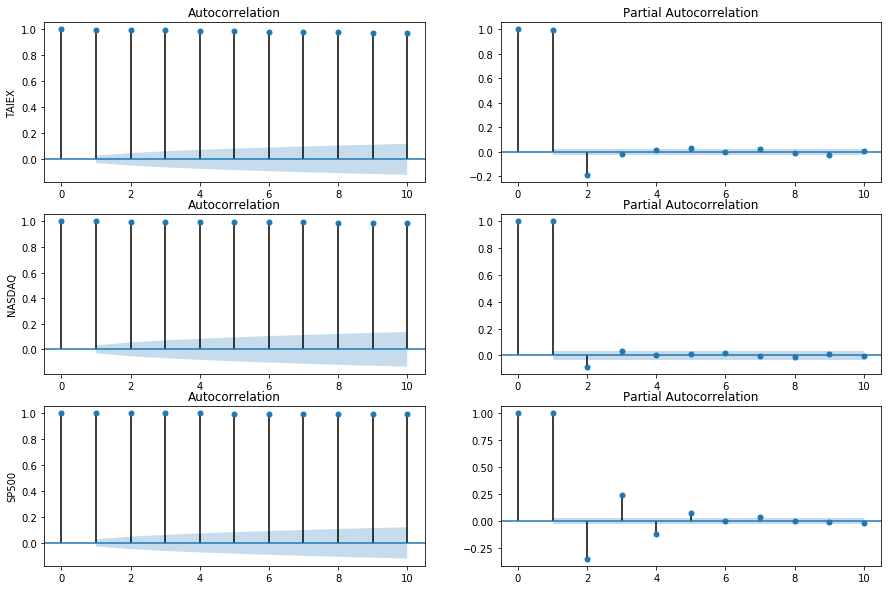

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=[15,10])

for ct, ds in enumerate(datasets.keys()):
    dataset = datasets[ds]
    ax[ct][0].set_ylabel(ds)
    plot_acf(dataset, lags=10, ax=ax[ct][0])
    plot_pacf(dataset, lags=10, ax=ax[ct][1])